In [1]:
#Linear Equation y = a_0 + a_1 * x

In [2]:
#1 Basic Theory: Ordinary Least Squares (scipy.linalg.lstsq) Linear Regression 

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

print('score is', reg.score(X, y))

print('coef is', reg.coef_)

print('intercept is', reg.intercept_)

print('predict is', reg.predict(np.array([[3, 5]])))

score is 1.0
coef is [1. 2.]
intercept is 3.0000000000000018
predict is [16.]


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


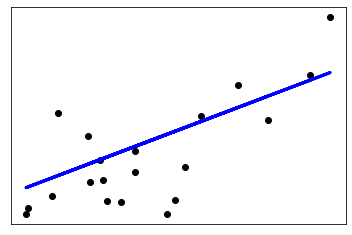

In [3]:
#2 Basic Theory: Ordinary Least Squares (scipy.linalg.lstsq) Linear Regression 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [4]:
#Create a pandas DataFrame for the counts data set.
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/tvelichkovt/PyTorch/main/nyc_bb_bicyclist_counts.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


In [5]:
df.describe()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
count,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.132430,2680.042056
std,10.390443,9.305792,0.394004,854.710864
min,46.000000,37.000000,0.000000,151.000000
25%,66.900000,55.225000,0.000000,2298.000000
50%,75.900000,64.000000,0.000000,2857.000000
75%,82.000000,70.000000,0.037500,3285.000000
max,93.900000,78.100000,3.030000,4960.000000


In [6]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
#Add a few derived regression variables.
ds = df.index.to_series()

#before
print('before is: ', df.head().index[1])

#after
print('after is: ', ds.dt.month[1:2])


before is:  2017-04-02 00:00:00
after is:  Date
2017-04-02    4
Name: Date, dtype: int64


In [8]:
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

df.to_csv("nyc_bb_bicyclist_counts_output.csv")

df.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT,MONTH,DAY_OF_WEEK,DAY
Date,,,,,,,
2017-04-01,46.0,37.0,0.00,606,4,5,1
2017-04-02,62.1,41.0,0.00,2021,4,6,2
2017-04-03,63.0,50.0,0.03,2470,4,0,3
2017-04-04,51.1,46.0,1.18,723,4,1,4
2017-04-05,63.0,46.0,0.00,2807,4,2,5


In [9]:
#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

df_train.to_csv("nyc_bb_bicyclist_counts_output_train.csv")
df_test.to_csv("nyc_bb_bicyclist_counts_output_test.csv")


print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=172
Testing data set length=42


In [10]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

expr

'BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP'

In [11]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [12]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [13]:
#Print the training summary.
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  172
Model:                            GLM   Df Residuals:                      165
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11993.
Date:                Mon, 09 Aug 2021   Deviance:                       22325.
Time:                        20:02:25   Pearson chi2:                 2.20e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.0325      0.012    576.337      

In [14]:
#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)

In [15]:
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame.head())

                   mean    mean_se  mean_ci_lower  mean_ci_upper
Date                                                            
2017-04-02  2525.225203  13.996257    2497.941506    2552.806906
2017-04-04   819.088628   8.152727     803.264430     835.224561
2017-04-15  2420.058091   8.352559    2403.742621    2436.484302
2017-04-16  3288.903319  15.918371    3257.851402    3320.251206
2017-04-21  1589.131013   7.505001    1574.489350    1603.908833


In [16]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']

output = pd.concat([(predicted_counts), (actual_counts)], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

output['diff'] = output['mean'] - output['BB_COUNT'] 

output.head()

,mean,BB_COUNT,diff
Date,,,
2017-04-02,2525.225203,2021.0,504.225203
2017-04-04,819.088628,723.0,96.088628
2017-04-15,2420.058091,2253.0,167.058091
2017-04-16,3288.903319,2877.0,411.903319
2017-04-21,1589.131013,1426.0,163.131013


In [17]:
percentage_err = "{:.2%}".format(output['diff'].abs().sum()/output['mean'].sum())
percentage_err

'17.44%'

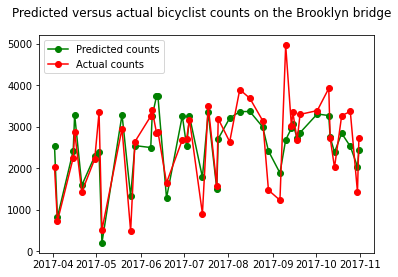

In [18]:
#Plot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

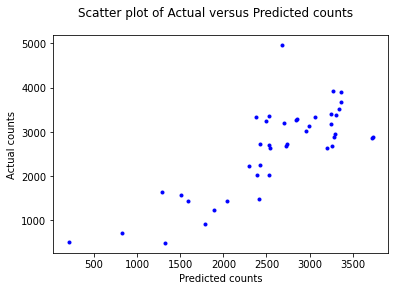

In [25]:
#Show scatter plot of Actual versus Predicted counts
import matplotlib.pyplot as plt

plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.',color='b')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()